In [3]:
%load_ext autoreload

%autoreload 2


from sbalign.training.diffusivity import *
from torch.distributions.multivariate_normal import MultivariateNormal
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


time shape  torch.Size([1001])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.0000, 1.0000, 1.0000, 1.0000]])
time shape  torch.Size([1, 1])
G shape  tensor([[0.9559, 1.

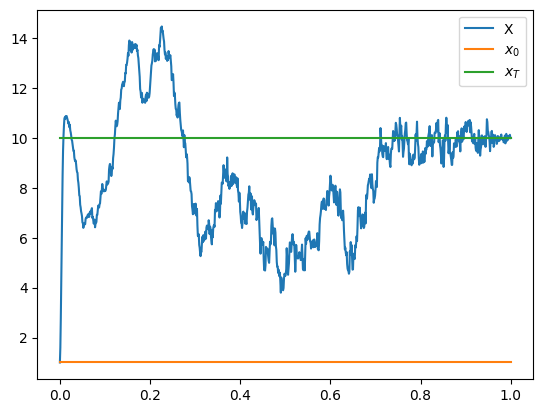

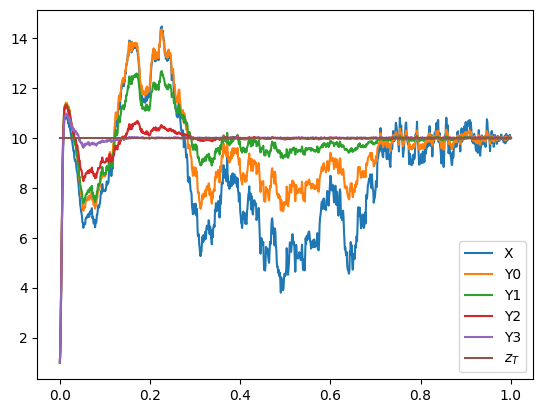

In [19]:
a = 1.0 #start value z_0 of process
b = 10.0 #end value z_T of process

# so far it only works for K<=2, where for K=2 it only works for H=>0.5 - other K and H result in non positiv definit covariance matrix
# todo: check all formulars again

H=0.5 #0.5
K=4

fbb = FBB(H=H, K=K, gamma_min=1.0,gamma_max=20)

N = 1000
T = 1.0
dt = T/N 

time = torch.linspace(0,1,N+1)
#time = time.repeat(1,2)
print("time shape ", time.shape)
Z = torch.ones(N+1,K+1) * a
zT = torch.ones(K+1)*b

for i in range(N):
    z = Z[i]
    t = time[i+1]
    #mean,cov = fbb.pinned_statistics(torch.tensor([t]),z,zT)
    mean,cov = fbb.pinned_statistics(t[None,None],z,zT)
    #mvn = MultivariateNormal(mean,cov)  


    scale_tril = torch.cholesky(cov + 1e-4 * torch.eye(cov.size(0)))
    mvn = MultivariateNormal(mean, scale_tril=scale_tril)

    
    sample = mvn.sample(sample_shape=(1,))
    Z[i+1] = sample

plt.plot(time,Z[:,0],label='X')
plt.plot(time,(torch.ones_like(Z)*a)[:,0],label=r'$x_0$')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$x_T$')
plt.legend()
plt.show()
plt.close()

plt.plot(time,Z[:,0],label='X')
for k in range(K):
    plt.plot(time,Z[:,k+1], label=f'Y{k}')
plt.plot(time,(torch.ones_like(Z)*b)[:,0],label=r'$z_T$')
plt.legend()
plt.show()
plt.close()